In [85]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np

Define degree and weight list generators.

In [86]:
#generate random weight
def ran_weight(l, min, max):
    #l: length of the list
    #max/min: max/min of the list element
    randomlist = []
    for i in range(l):
        n = random.randint(min,max)
        randomlist.append(n)

    return randomlist

#generate random degree for simple connected diagram
def ran_deg(l, min=1 , max=None):
    #l: length
    #max/min: max/min of the degree
    max-=1
    list = []
    for i in range(l):
        n = random.randint(min,max)
        list.append(n)
    
    if sum(list)%2 != 0:
        k = int(random.random()*l)
        if list[k] == 1:       
            list[k] = list[k] + 1
        else:
            list[k] = list[k] - 1
    
    return list

Example

degree= [2, 5, 2, 2, 4, 5, 4, 6, 6, 4]
weight= [1, 9, 5, 4, 10, 1, 8, 6, 9, 9]
graph degree sequence [(0, 2), (1, 5), (2, 2), (3, 2), (4, 4), (5, 5), (6, 4), (7, 6), (8, 6), (9, 4)]


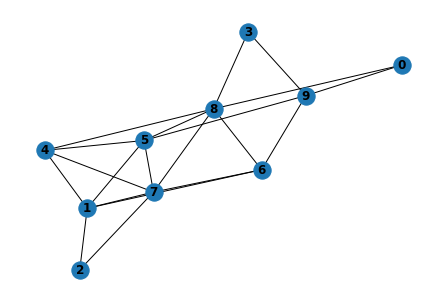

In [87]:
from Gphase.Gphase import Gphase

length = 10
d_min = 2 #minimal degree, not suggested to be 1 for small d_max
d_max = 7 #maximal degree, where d_max < length, d_max not suggested to be small
w_min = 1 
w_max = 10

degree = ran_deg(length, d_min, d_max)
weight = ran_weight(length, w_min, w_max)

print('degree=', degree)
print('weight=', weight)


GP = Gphase(degree, weight)
G = GP.graph_gen()
nx.draw(G, with_labels=True, font_weight='bold')
print('graph degree sequence', G.degree())

Plot phase diagram.

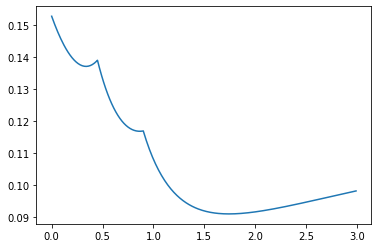

In [88]:
max_lamb = 3
lam_list, chi_list = GP.var_phase(max_lamb)

plt.plot(lam_list, chi_list)

Derivatives of phase diagram.

In [89]:
dev1, dev2, m_index = GP.dev(lam_list, chi_list)

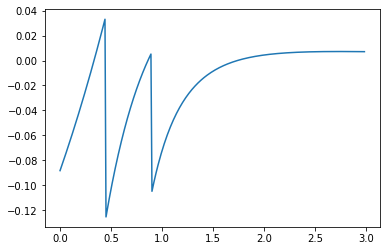

In [90]:
plt.plot(lam_list[:-1], dev1)

transitions at [0.44 0.89]


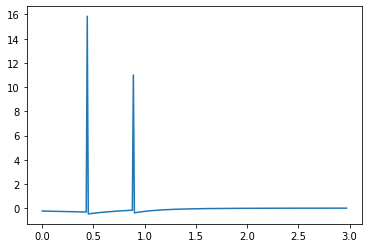

In [91]:
plt.plot(lam_list[:-2], dev2)
print('transitions at', m_index)

Reduced weight lists for chosen lambdas. You can do manual verification using this.

In [92]:
l_chosen, w_red = GP.verify_list(m_index, lam_list)

print('choose lambda at', l_chosen)
print('reduced weight', w_red)

choose lambda at [0.22, 0.665, 1.94]
reduced weight [array([-0.38223235,  0.18610478, -0.48246014, -0.45740319, -0.0952164 ,
        0.38656036, -0.04510251,  0.51753986,  0.44236902, -0.07015945]), array([-0.11073326,  0.04123273, -0.39341126, -0.32274176, -0.2685441 ,
        0.60658874, -0.1272051 ,  0.49234857,  0.28034006, -0.1978746 ]), array([ 0.28351091, -0.16144089, -0.11019787, -0.01177067, -0.37402334,
        0.62597666, -0.17716895,  0.24799594, -0.04728564, -0.27559614])]


Calculate maximum weight by calcuating for every lambda.

In [93]:
w_tot_list = []
L_list = []

for w_reduced in w_red:
    I, w_tot = GP.total_weight(G, w_reduced, weight)
    L_list.append(I)
    w_tot_list.append(w_tot)

max_index = w_tot_list.index(max(w_tot_list))
print('maximum weight is ', max(w_tot_list))
print('chosen nodes are', L_list[max_index])

maximum weight is  28
chosen nodes are [2, 3, 0, 4, 6]
